In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Loading the necessary libraries-----------------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import mannwhitneyu
import os
#Turns on “inline plotting”, where plot graphics will appear in your notebook
%matplotlib inline

In [3]:
### loading the Data
TrainBenign_df = pd.read_csv("../TrainBenign.csv")
TrainPathogenic_df = pd.read_csv("../TrainPathogenic.csv")
TestBenign_df = pd.read_csv("../TestBenign.csv")
TestPathogenic_df = pd.read_csv("../TestPathogenic.csv")

In [4]:
#Printing the number of rows and columns in train benign dataframe
n_rows, n_col = TrainBenign_df.shape
print("The number of rows in TrainBenign dataset is", n_rows)
print("The number of columns in TrainBenign dataset is", n_col)

The number of rows in TrainBenign dataset is 10158
The number of columns in TrainBenign dataset is 48


In [5]:
#Printing the number of rows and columns in train pathogenic dataframe
n_rows, n_col = TrainPathogenic_df.shape
print("The number of rows in TrainPathogenic dataset is", n_rows)
print("The number of columns in TrainPathogenic dataset is", n_col)

The number of rows in TrainPathogenic dataset is 6547
The number of columns in TrainPathogenic dataset is 48


In [6]:
#Printing the number of rows and columns in test benign dataframe
n_rows, n_col = TestBenign_df.shape
print("The number of rows in TestBenign dataset is", n_rows)
print("The number of columns in TestBenign dataset is", n_col)

The number of rows in TestBenign dataset is 3010
The number of columns in TestBenign dataset is 48


In [7]:
#Printing the number of rows and columns in test pathogenic dataframe
n_rows, n_col = TestPathogenic_df.shape
print("The number of rows in TestPathogenic dataset is", n_rows)
print("The number of columns in TestPathogenic dataset is", n_col)

The number of rows in TestPathogenic dataset is 1335
The number of columns in TestPathogenic dataset is 48


In [8]:
#A function to Compute the total number of empty rows in individual columns
def detect_missn_vals_and_counts(df, missn_vals=["?", ",", "N/A", "nan", "NaN", "null"]):
    missn_info = {}
    for col in df.columns:
        col_missn_counts = {}

        temp_col = df[col].astype(str)
        for val in missn_vals:
            count = temp_col.apply(lambda x: x.strip() == val).sum()
            if count > 0:
                col_missn_counts[val] = count
        if col_missn_counts:
            missn_info[col] = col_missn_counts
    return missn_info

In [9]:
#Printing the total number of empty rows in each column in the train benign dataframe
print(detect_missn_vals_and_counts(TrainBenign_df))

{'Mutation': {'nan': 1661}, 'dTotal_Energy': {'nan': 1661}, 'dBackbone_Hbond': {'nan': 1661}, 'dSidechain_Hbond': {'nan': 1661}, 'dVan_der_Waals': {'nan': 1661}, 'dElectrostatics': {'nan': 1661}, 'dSolvation_Polar': {'nan': 1661}, 'dSolvation_Hydrophobic': {'nan': 1661}, 'dVan_der_Waals_Clashes': {'nan': 1661}, 'dEntropy_Sidechain': {'nan': 1661}, 'dEntropy_Mainchain': {'nan': 1661}, 'dShort_Loop_Entropy': {'nan': 1661}, 'dMedium_Loop_Entropy': {'nan': 1661}, 'dCis_Bond': {'nan': 1661}, 'dTorsional_Clash': {'nan': 1661}, 'dBackbone_Clash': {'nan': 1661}, 'dHelix_Dipole': {'nan': 1661}, 'dWater_Bridge': {'nan': 1661}, 'dDisulfide': {'nan': 1661}, 'dElectrostatic_kon': {'nan': 1661}, 'dPartial_Covalent_Bonds': {'nan': 1661}, 'dIonization_Energy': {'nan': 1661}, 'dEntropy_Complex': {'nan': 1661}}


In [10]:
#Printing the total number of empty rows in each column in the train pathogenic dataframe
print(detect_missn_vals_and_counts(TrainPathogenic_df))

{'Mutation': {'nan': 1583}, 'dTotal_Energy': {'nan': 1583}, 'dBackbone_Hbond': {'nan': 1583}, 'dSidechain_Hbond': {'nan': 1583}, 'dVan_der_Waals': {'nan': 1583}, 'dElectrostatics': {'nan': 1583}, 'dSolvation_Polar': {'nan': 1583}, 'dSolvation_Hydrophobic': {'nan': 1583}, 'dVan_der_Waals_Clashes': {'nan': 1583}, 'dEntropy_Sidechain': {'nan': 1583}, 'dEntropy_Mainchain': {'nan': 1583}, 'dShort_Loop_Entropy': {'nan': 1583}, 'dMedium_Loop_Entropy': {'nan': 1583}, 'dCis_Bond': {'nan': 1583}, 'dTorsional_Clash': {'nan': 1583}, 'dBackbone_Clash': {'nan': 1583}, 'dHelix_Dipole': {'nan': 1583}, 'dWater_Bridge': {'nan': 1583}, 'dDisulfide': {'nan': 1583}, 'dElectrostatic_kon': {'nan': 1583}, 'dPartial_Covalent_Bonds': {'nan': 1583}, 'dIonization_Energy': {'nan': 1583}, 'dEntropy_Complex': {'nan': 1583}}


In [11]:
#Printing the total number of empty rows in each column in the test benign dataframe
print(detect_missn_vals_and_counts(TestBenign_df))

{'Mutation': {'nan': 785}, 'dTotal_Energy': {'nan': 785}, 'dBackbone_Hbond': {'nan': 785}, 'dSidechain_Hbond': {'nan': 785}, 'dVan_der_Waals': {'nan': 785}, 'dElectrostatics': {'nan': 785}, 'dSolvation_Polar': {'nan': 785}, 'dSolvation_Hydrophobic': {'nan': 785}, 'dVan_der_Waals_Clashes': {'nan': 785}, 'dEntropy_Sidechain': {'nan': 785}, 'dEntropy_Mainchain': {'nan': 785}, 'dShort_Loop_Entropy': {'nan': 785}, 'dMedium_Loop_Entropy': {'nan': 785}, 'dCis_Bond': {'nan': 785}, 'dTorsional_Clash': {'nan': 785}, 'dBackbone_Clash': {'nan': 785}, 'dHelix_Dipole': {'nan': 785}, 'dWater_Bridge': {'nan': 785}, 'dDisulfide': {'nan': 785}, 'dElectrostatic_kon': {'nan': 785}, 'dPartial_Covalent_Bonds': {'nan': 785}, 'dIonization_Energy': {'nan': 785}, 'dEntropy_Complex': {'nan': 785}}


In [12]:
#Printing the total number of empty rows in each column in the test pathogenic dataframe
print(detect_missn_vals_and_counts(TestPathogenic_df))

{'Mutation': {'nan': 512}, 'dTotal_Energy': {'nan': 512}, 'dBackbone_Hbond': {'nan': 512}, 'dSidechain_Hbond': {'nan': 512}, 'dVan_der_Waals': {'nan': 512}, 'dElectrostatics': {'nan': 512}, 'dSolvation_Polar': {'nan': 512}, 'dSolvation_Hydrophobic': {'nan': 512}, 'dVan_der_Waals_Clashes': {'nan': 512}, 'dEntropy_Sidechain': {'nan': 512}, 'dEntropy_Mainchain': {'nan': 512}, 'dShort_Loop_Entropy': {'nan': 512}, 'dMedium_Loop_Entropy': {'nan': 512}, 'dCis_Bond': {'nan': 512}, 'dTorsional_Clash': {'nan': 512}, 'dBackbone_Clash': {'nan': 512}, 'dHelix_Dipole': {'nan': 512}, 'dWater_Bridge': {'nan': 512}, 'dDisulfide': {'nan': 512}, 'dElectrostatic_kon': {'nan': 512}, 'dPartial_Covalent_Bonds': {'nan': 512}, 'dIonization_Energy': {'nan': 512}, 'dEntropy_Complex': {'nan': 512}}


In [13]:
mTrainBenign_df = TrainBenign_df.dropna(how="any")
mTrainPathogenic_df = TrainPathogenic_df.dropna(how="any")
mTestBenign_df = TestBenign_df.dropna(how="any")
mTestPathogenic_df = TestPathogenic_df.dropna(how="any")

In [14]:
def unique_col_vals(df):
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ["Total"]

    uniq = []
    for col in df.columns:
        uniq_val = df[col].nunique()
        uniq.append(uniq_val)

    temp["Unique"] = uniq
    return(np.transpose(temp))

In [15]:
#Printing count of unique values in each column in the train pathogenic dataframe
unique_col_vals(mTrainPathogenic_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
Unique,4964,4862,4592,4488,4792,4441,4779,4833,4777,4870,...,102,3486,2131,2391,1,123,1,1,1009,1


In [16]:
#Printing count of unique values in each column in the train benign dataframe
unique_col_vals(mTrainBenign_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,8497,8497,8497,8497,8497,8497,8497,8497,8497,8497,...,8497,8497,8497,8497,8497,8497,8497,8497,8497,8497
Unique,8497,8312,6581,6414,8087,6383,8097,8155,7283,8336,...,960,3639,1494,2033,1,27,1,1,753,1


In [17]:
#Printing count of unique values in each column in the test pathogenic dataframe
unique_col_vals(mTestPathogenic_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,823,823,823,823,823,823,823,823,823,823,...,823,823,823,823,823,823,823,823,823,823
Unique,823,821,802,781,814,779,817,815,810,821,...,6,704,583,478,1,13,1,1,194,1


In [18]:
#Printing count of unique values in each column in the test benign dataframe
unique_col_vals(mTestBenign_df)

,Pdb,Total_energy,Backbone_Hbond,Sidechain_Hbond,Van_der_Waals,Electrostatics,Solvation_Polar,Solvation_Hydrophobic,Van_der_Waals_clashes,Entropy_sidechain,...,dCis_Bond,dTorsional_Clash,dBackbone_Clash,dHelix_Dipole,dWater_Bridge,dDisulfide,dElectrostatic_kon,dPartial_Covalent_Bonds,dIonization_Energy,dEntropy_Complex
Total,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,...,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
Unique,2225,2210,1874,1809,2163,1797,2159,2176,2024,2206,...,279,1309,687,631,1,8,1,1,220,1


In [19]:
#Defining a function to identify columns with a single unique count
def show_single_uniq_col(df):
    single_uniq_col = [col for col in df.columns if df[col].nunique() in (1,2,3,4)]
    return single_uniq_col

In [20]:
#Printing columns with single unique count in train benign dataframe
show_single_uniq_col(mTrainBenign_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [21]:
#Printing columns with single unique count in train pathogenic dataframe
show_single_uniq_col(mTrainPathogenic_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [22]:
#Printing columns with single unique count in test pathogenic dataframe
show_single_uniq_col(mTestPathogenic_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [23]:
#Printing columns with single unique count in test benign dataframe
show_single_uniq_col(mTestBenign_df)

['sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'Class',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex']

In [24]:
#Defining a list of all columns with a single unique value. Add Pdb, Mutation and Variant columns since they have no relevance in downstream analysis
col_to_drop = [
 'Pdb', 
 'Mutation', 
 'Variant',
 'sloop_entropy',
 'mloop_entropy',
 'Water_bridge',
 'Electrostatic_kon',
 'Partial_covalent_bonds',
 'Entropy_Complex',
 'dShort_Loop_Entropy',
 'dMedium_Loop_Entropy',
 'dWater_Bridge',
 'dElectrostatic_kon',
 'dPartial_Covalent_Bonds',
 'dEntropy_Complex'
]

In [25]:
#Dropping the defined columns 
mTrainBenign_df = mTrainBenign_df.drop(columns=col_to_drop)
mTrainPathogenic_df = mTrainPathogenic_df.drop(columns=col_to_drop)
mTestBenign_df = mTestBenign_df.drop(columns=col_to_drop)
mTestPathogenic_df = mTestPathogenic_df.drop(columns=col_to_drop)

In [26]:
train_dtframes = [mTrainBenign_df, mTrainPathogenic_df] #Merging the two categories of train dataframe
test_dtframes = [mTestBenign_df, mTestPathogenic_df] #Merging the two categories of test dataframe

#Merge and shuffle the data. Reset index after shuffling to ensure clean indices 
train_df = pd.concat(train_dtframes).sample(frac=1).reset_index(drop=True)
test_df = pd.concat(test_dtframes).sample(frac=1).reset_index(drop=True)

In [27]:
#There are two classes in the target variable. Let's check if the class is imbalanced in the train dataset. 
#Let's do this with Random Under-Sampling technique. We want a 50/50 ratio between the two classes
#First, let's determine the total count of the two classes and bring them to the same count
train_df["Class"].value_counts()

Benign        8497
Pathogenic    4964
Name: Class, dtype: int64

In [28]:
#The Class Payhogenic has 4964 counts. We have to get the same representation for the Benign Class
class_pathogenic = train_df[train_df["Class"] == "Pathogenic"]
class_benign = train_df[train_df["Class"] == "Benign"][:4964]

#Combine the two classes and shuffle the final rows in the dataset.
class_merge = pd.concat([class_pathogenic, class_benign])
final_train_df = class_merge.sample(frac=1, random_state=42).reset_index(drop=True)

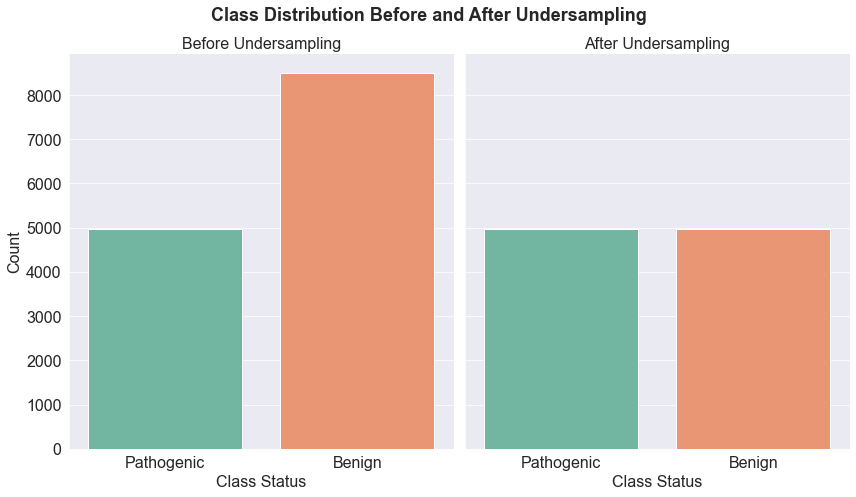

In [29]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2, figsize=(12, 7), sharey=True)
fig.suptitle("Class Distribution Before and After Undersampling", fontsize=18, fontweight='bold')

sns.countplot(x="Class", data=train_df, ax=axs[0], palette="Set2")
sns.countplot(x="Class", data=final_train_df, ax=axs[1], palette="Set2")

axs[0].set_title("Before Undersampling", fontsize=16)
axs[0].set_xlabel("Class Status", fontsize=16)
axs[0].set_ylabel("Count", fontsize=16)
axs[0].tick_params(axis='both', labelsize=16)

axs[1].set_title("After Undersampling", fontsize=16)
axs[1].set_xlabel("Class Status", fontsize=16)
axs[1].set_ylabel("Count", fontsize=16)
axs[1].tick_params(axis='both', labelsize=16)

sns.despine()
plt.tight_layout()
plt.show();

In [30]:
#List columns with negative values. 
col = [
    'Class',
    'Total_energy',
    'Solvation_Polar', 
    'Van_der_Waals_clashes', 
    'Entropy_sidechain', 
    'Entropy_mainchain',
    'cis_bond', 
    'Torsional_clash', 
    'Backbone_clash', 
    'Energy_Ionisation'
]

In [31]:
#Call the abs() function on all columns with negative values
train_dt = final_train_df.copy()
test_dt = test_df.copy()

train_dt.loc[:, ~train_dt.columns.isin(col)] = train_dt.loc[:, ~train_dt.columns.isin(col)].abs()
test_dt.loc[:, ~test_dt.columns.isin(col)] = test_dt.loc[:, ~test_dt.columns.isin(col)].abs()

### Let's plot the association of some of the features with the variant pathogenicity

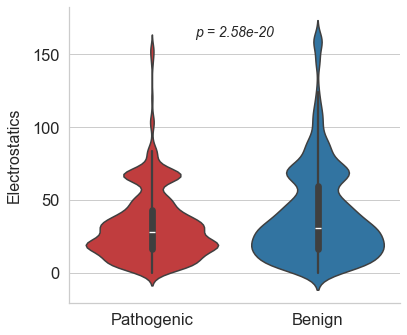

In [32]:
#The distribution of Electrostatics between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the electrostatics values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="Electrostatics", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel("Electrostatics", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["Electrostatics"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["Electrostatics"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["Electrostatics"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.savefig("violin_plot_with_p_value.png", dpi=300)
plt.show()

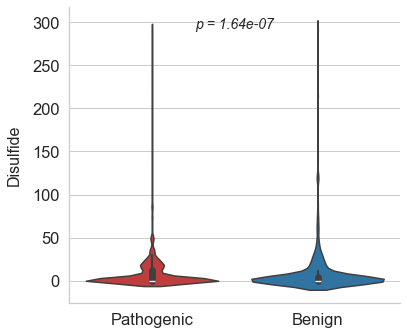

In [33]:
#The distribution of disulfide between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.


# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="Disulfide", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel("Disulfide", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["Disulfide"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["Disulfide"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["Disulfide"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()

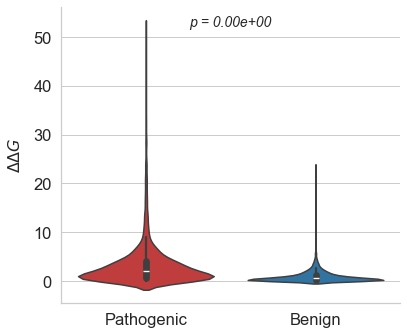

In [34]:
#The differences of total energy change between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 5))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="dTotal_Energy", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel(r"$\Delta \Delta G$", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["dTotal_Energy"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["dTotal_Energy"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["dTotal_Energy"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()

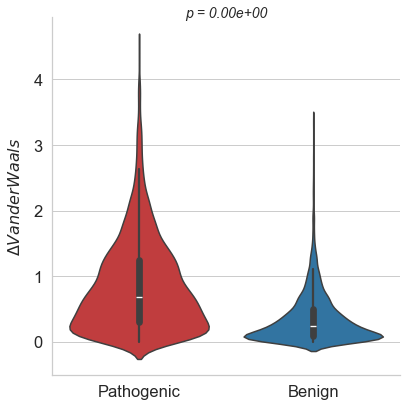

In [35]:
#The differences of Van der Waals interactions between the benign and pathogenic variants (Mann-Whitney U test). 
#The violin plot depicts the distribution of the disulfide values using density curves. 
#The boxes show the median +/- one quatile. Whiskers extend 1.5 times the inter-quartile range.

# Plotting the violin plot
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(6, 6))

# Create the violin plot
sns.violinplot(
    x="Class", 
    y="dVan_der_Waals", 
    data=train_dt, 
    inner="box", 
    linewidth=1.5, 
    palette={"Benign": "#1f77b4", "Pathogenic": "#d62728"}
)

# Add axis labels
plt.xlabel("", fontsize=16, labelpad=10)
plt.ylabel(r"$\Delta Van der Waals$", fontsize=16, labelpad=10)

benign = train_dt[train_dt["Class"] == "Benign"]["dVan_der_Waals"]
pathogenic = train_dt[train_dt["Class"] == "Pathogenic"]["dVan_der_Waals"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(benign, pathogenic, alternative="two-sided")

# Add p-value annotation
plt.text(0.5, max(train_dt["dVan_der_Waals"]) + 0.5, f"p = {p_value:.2e}", ha='center', fontsize=14, fontstyle='italic')
sns.despine()

# Adjust layout and save plot
plt.tight_layout()
plt.show()